In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tables as tb

In [7]:
db = tb.open_file('data/market.hdf5')

In [8]:
# 종목코드
group = 'ZC'

In [9]:
# 일일 ohlc 데이터프레임 생성
daily = pd.DataFrame(getattr(db.root, group).Daily.read())
daily = daily.sort_values('date', ascending=True) # 날짜 정렬
daily = daily.assign(date=daily.date.astype('M8[s]'))

### 1. Kurtosis, Autocorrelation coefficient 구하기

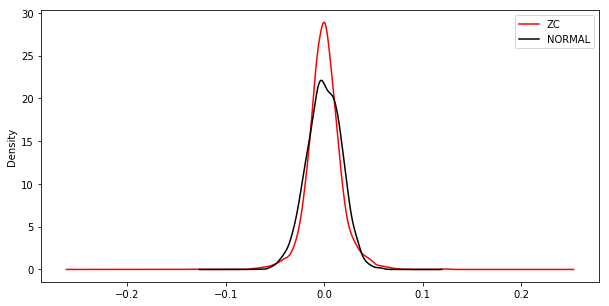

In [22]:
# 일일 종가 변화율 =log(전일종가/오늘종가)
dist = daily[['date','close']].copy(deep=True)

# time frame
TIMEFRAME = 1
dist = dist[0:-1:TIMEFRAME]
dist['change'] = dist.close.pct_change()

ax = dist.plot.kde(x='date',y='change', color='red', figsize=(10,5))

#plot normal distribution
np.random.seed(1000)
mean = dist.change.mean()
std = dist.change.std()
size = 3000#en(dist)
norm_data = pd.DataFrame(np.random.normal(loc=mean, scale=std, size=size))
norm_data.plot.kde(color='black',label='norm', ax=ax)

#평균 수직선
#plt.vlines(dist.range.mean(), ymin=0, ymax=65, linewidth=2.0, color='green')

#legend
ax.legend([group, 'NORMAL']); #legend

In [23]:
print('mean: ', dist.change.mean())
print('kurtosis: ', dist.change.kurtosis())
print('skewness: ', dist.change.skew())
print('autocorr: ', dist.change.autocorr())

mean:  0.000275554657579
kurtosis:  3.75575478532
skewness:  0.204977230737
autocorr:  0.0340878347127


### 2. kurtosis와 autocorrelation coefficient의 상관계수 구하기

In [7]:
kurtosis = []
autocorr = []
for item in db.iter_nodes('/'):
    grp = item._v_name
    daily = pd.DataFrame(getattr(db.root, grp).Daily.read())
    daily = daily.sort_values('date', ascending=True) # 날짜 정렬
    daily['change'] = np.log(daily.close.shift(1)/daily.close)
    temp = daily['change'][-300:]
    if temp.kurtosis() is not np.nan:
        kurtosis.append(temp.kurtosis())
        autocorr.append(abs(temp.autocorr()))
    #kurtosis.append(daily.change.kurtosis())
    #autocorr.append(abs(daily.change.autocorr()))
    #print(f"{item._v_title} : kurtosis: {daily.change.kurtosis()}, autocorr: {daily.change.autocorr()}")

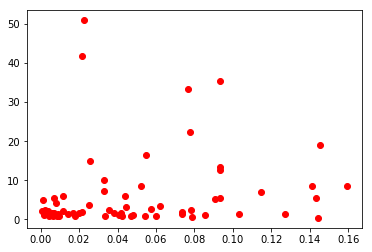

In [8]:
plt.plot(autocorr,kurtosis, 'ro')
#plt.axis([0, 0.1, 0, 50])

In [77]:
# 상관계수
np.corrcoef([kurtosis, autocorr])

array([[ 1.       ,  0.1651994],
       [ 0.1651994,  1.       ]])